<div style="text-align: center; border: 1px solid black;">
    <div style="display: inline-flex; justify-content: center; align-items: center; ">
        <img src="https://www.di.ubi.pt/~rcampos/assets/img/ubi.jpg" alt="First Image" style="margin: 10px;"/>
        <img src="https://www.di.ubi.pt/~rcampos/assets/img/DI_FE.jpg" alt="Second Image" style="margin: 10px;"/>
    </div>
</div>

<b><center><font size="4">Mini Projeto III <br /> Data Wrangling and Exploratory Data Analysis </font></center></b>
<center><font size="2">Elaborado por: <br /> <b>Tassia da Silva de Carvalho</b><br />(M14307 - tassia.carvalho@ubi.pt)</font></center>
<br />
<div style="text-align: center;">
    <font size="2">Trabalho apresentado no âmbito da disciplina de <b>Ciência de Dados</b>, sob orientação do <b>Prof. Dr Ricardo Campos</b></font><br>
</div>

<div style="text-align: center;">
    <b>Objetivo</b>: Familiarização com o processo de limpeza de dados e análise exploratória de
dados.
</div>

<hr />

# Introdução ao Dataset

O presente trabalho utiliza o dataset <b>“Sleep Health and Lifestyle”</b>, disponível na plataforma Kaggle, que reúne dados de saúde, estilo de vida e sono de diferentes indivíduos. Este conjunto de dados foi construído com o intuito de apoiar investigações sobre os factores que influenciam a qualidade do sono e o bem-estar geral das pessoas.

O dataset inclui diversas variáveis relacionadas com:
    <ul>
    <li>Características demográficas: género, idade e ocupação;</li>
    <li>Estilo de vida: duração média do sono, nível de actividade física, passos diários;</li>
    <li>Parâmetros de saúde: pressão arterial, frequência cardíaca, índice de massa corporal (IMC) e presença de distúrbios do sono;</li>
    <li>Indicadores subjectivos: qualidade percebida do sono e nível de stress.</li>
</ul>
Com um total de aproximadamente 370 registos, o dataset permite explorar relações entre factores fisiológicos, comportamentais e ambientais, sendo particularmente adequado para análises exploratórias e formulação de hipóteses em contextos de saúde preventiva e qualidade de vida.

**Dataset:** Sleep Health and Lifestyle
**Fonte:** [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

## 1. Importação do ficheiro CSV

### Formas de obter o ficheiro CSV

✅ Opção 1: Usar GitHub 

In [ ]:
import pandas as pd

# URL direta para o ficheiro CSV (modo raw)
url_csv = "https://raw.githubusercontent.com/tassiascarvalho/ciencia-de-dados-notebooks/main/datawrangling-exploratorydataanalysis/Sleep_health_and_lifestyle_dataset.csv"

# Leitura do CSV diretamente da internet
df = pd.read_csv(url_csv)
print(df.head())

✅ Opção 2: Usar a API oficial do Kaggle para fazer o download

In [ ]:
pip install kagglehub

import kagglehub
import pandas as pd
import os

# Download do dataset
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")
print("Path to dataset files:", path)

# Caminho completo para o CSV dentro da pasta baixada
csv_path = os.path.join(path, "Sleep_health_and_lifestyle_dataset.csv")

# Leitura do CSV
df = pd.read_csv(csv_path)
print(df.head())


## 2. Primeiros 5 registos

In [22]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### 📝 Análise preliminar da amostra

Com base nos cinco primeiros registos do dataset Sleep Health and Lifestyle, é possível observar desde já uma boa estrutura dos dados, com colunas coerentes e informativas que relacionam características pessoais, estilo de vida e indicadores de saúde. Verificam-se padrões esperados, como a associação entre menor atividade física, obesidade, pressão arterial elevada e a presença de distúrbios do sono (ex.: Sleep Apnea).

No entanto, também se identificam inconsistências e limitações que apontam para a necessidade de um tratamento cuidadoso dos dados. Por exemplo:

<ul>
<li>A coluna “Sleep Disorder” apresenta valores ausentes (NaN), o que requer técnicas de imputação ou análise específica;</li>  
<li>Algumas variáveis como “Blood Pressure” estão em formato de texto composto, exigindo transformação em atributos separados (ex.: sistólica e diastólica);</li>
<li>Pode ser útil criar variáveis derivadas como faixas etárias, índice de saúde cardiovascular ou classificação de stress para enriquecer a análise.</li>
</ul>

Assim, a exploração inicial não só evidencia a relevância analítica do conjunto de dados, como também destaca a necessidade de aplicar técnicas de data wrangling para preparar o dataset para análises mais robustas.

In [37]:
df.dtypes.reset_index().rename(columns={'index': 'Coluna', 0: 'Tipo de Dado'})

,Coluna,Tipo de Dado
0,Person ID,int64
1,Gender,object
2,Age,int64
3,Occupation,object
4,Sleep Duration,float64
5,Quality of Sleep,int64
6,Physical Activity Level,int64
7,Stress Level,int64
8,BMI Category,object
9,Blood Pressure,object


Uma observação relevante diz respeito à tipagem dos dados (dtypes) atribuída automaticamente pelo pandas. Embora funcional, o tipo int64 tenha sido aplicado a colunas como Person ID, Age ou Stress Level, este representa uma utilização desnecessariamente extensa de memória, tendo em conta os limites reais desses atributos. Em contextos de produção ou datasets de grande dimensão, seria mais adequado converter estas colunas para tipos mais leves, como int8, int16 ou category (quando aplicável), reduzindo assim o uso de memória e melhorando o desempenho computacional nas análises subsequentes.

#### ⚠️ Nota sobre dados ausentes

Antes de avançar com a análise de correlação (atividade 3), importa referir que algumas colunas do dataset, como Sleep Disorder, contêm valores ausentes. Embora a maioria das variáveis numéricas esteja completa, é essencial reconhecer que a presença de dados nulos em variáveis relevantes pode, em certos contextos, influenciar os resultados estatísticos.

Neste momento, a análise será conduzida com os dados disponíveis, sem qualquer imputação ou limpeza. As correções e o tratamento adequado dos dados ausentes serão abordados especificamente nas atividades 5 e 6, onde se aplicam estratégias como a contagem de nulos e a imputação por mediana, com ou sem segmentação por grupo.

## 3. Correlação de Pearson

O atributo escolhido foi "Quality of Sleep" por se tratar de uma variável central no contexto do dataset, que tem como foco a saúde do sono e o estilo de vida. A qualidade do sono é um indicador subjectivo mas altamente relevante do bem-estar geral dos indivíduos, influenciando aspectos físicos, emocionais e cognitivos.

In [26]:
import numpy as np

# Matriz de correlação de Pearson (apenas atributos numéricos)
correlacoes = df.select_dtypes(include=[np.number]).corr(method='pearson')

#Atributo Quality of Sleep e ordenar os coeficientes
atributo_base = 'Quality of Sleep'
correlacoes[atributo_base].drop(atributo_base).sort_values(ascending=False)

Sleep Duration             0.883213
Age                        0.473734
Person ID                  0.431612
Physical Activity Level    0.192896
Daily Steps                0.016791
Heart Rate                -0.659865
Stress Level              -0.898752
Name: Quality of Sleep, dtype: float64

Observa-se que a "Quality of Sleep" tem forte correlação positiva com a "Sleep Duration" e negativa com o "Stress Level", o que está de acordo com o conhecimento intuitivo sobre hábitos de sono.

## 4. Mediana condicionada
#### A mediana da duração do sono entre pessoas com nível de stress elevado (≥7)

Nesta etapa, foi calculada a mediana da duração do sono considerando apenas os indivíduos com nível de stress elevado (Stress Level ≥ 7). Este tipo de filtragem permite compreender de forma mais específica como factores emocionais podem estar relacionados com a quantidade de horas dormidas. A escolha desta restrição justifica-se pelo facto de o stress ser um dos elementos com maior correlação negativa com a duração e a qualidade do sono, como evidenciado nas análises anteriores. O resultado obtido revela a tendência central do sono entre indivíduos potencialmente mais afectados psicologicamente.

In [30]:
df[df['Stress Level'] >= 7]['Sleep Duration'].median()

6.0

## 5. Contagem de valores nulos

Nesta etapa, foi realizada a contagem de valores nulos em quatro colunas de interesse: Sleep Duration, Quality of Sleep, Stress Level e Sleep Disorder. 

In [33]:
df[['Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Sleep Disorder']].isnull().sum()

Sleep Duration        0
Quality of Sleep      0
Stress Level          0
Sleep Disorder      219
dtype: int64

Os resultados demonstram que as três primeiras colunas estão completas, enquanto a coluna Sleep Disorder apresenta <b>219 registos com valor nulo</b>.

No entanto, é importante salientar que, neste caso, os valores ausentes em Sleep Disorder <b>não indicam erro ou omissão de dados</b>, mas sim <b>a ausência de diagnóstico reportado por parte dos indivíduos</b>. Na prática, um valor nulo nesta coluna pode ser interpretado como <b>"Nenhum distúrbio do sono"</b>.

Este tipo de análise é essencial para evitar interpretações incorrectas e preparar estratégias adequadas de imputação ou recodificação durante o processo de data wrangling, especialmente nas fases seguintes do trabalho.

## 6. Imputação por grupo

Foi desenvolvida uma função de imputação que tem como objectivo substituir os valores nulos de uma coluna numérica com a mediana desse atributo, calculada dentro de cada grupo de uma variável categórica. Neste caso, optou-se por aplicar a função à coluna Sleep Duration, agrupando por Occupation, ou seja, caso existissem valores em falta, cada um seria preenchido com a mediana da duração de sono correspondente à ocupação do indivíduo.

<b>O que a função imputar_mediana_por_grupo faz:<b/>
<ol>
<li>Recebe três parâmetros: o DataFrame, o nome da coluna alvo com valores nulos e o nome da coluna de agrupamento.</li>

<li>Para cada grupo distinto na coluna de agrupamento (Occupation), calcula a mediana da coluna alvo (Sleep Duration) dentro desse grupo.</li>

<li>Substitui os valores nulos da coluna alvo dentro daquele grupo específico com a mediana correspondente.</li>
</ol>

In [38]:
def imputar_mediana_por_grupo(dataframe, coluna_alvo, coluna_grupo):
    for grupo, dados in dataframe.groupby(coluna_grupo):
        mediana = dados[coluna_alvo].median()
        cond = (dataframe[coluna_grupo] == grupo) & (dataframe[coluna_alvo].isnull())
        dataframe.loc[cond, coluna_alvo] = mediana
    return dataframe

df = imputar_mediana_por_grupo(df, 'Sleep Duration', 'Occupation')


Contudo, ao verificar os dados antes da imputação, constatou-se que a coluna <b>Sleep Duration não apresenta valores nulos</b>, e, por isso, nenhuma substituição efectiva foi realizada. Ainda assim, a função foi executada com sucesso e encontra-se disponível para ser reutilizada noutras colunas ou cenários onde a imputação seja necessária.

Esta abordagem baseada em grupos é particularmente útil para preservar padrões internos dos dados e evitar que valores genéricos (como a mediana global) distorçam os resultados analíticos.

Como parte do processo de tratamento de dados, foi aplicada uma imputação na coluna Sleep Disorder, substituindo os valores nulos identificados anteriormente pela categoria "Nenhum". Esta decisão baseia-se no significado contextual dos dados, uma vez que a ausência de preenchimento nesta coluna indica, na prática, que o indivíduo não apresenta distúrbio do sono.

Esta imputação tem como objectivo tornar os dados mais completos e consistentes, facilitando análises posteriores sem alterar o significado original das informações recolhidas.

In [43]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Nenhum')

## 7. Criação de novas colunas derivadas

Para enriquecer o dataset e facilitar a análise exploratória, foram criadas 4 novas colunas a partir de variáveis já existentes. Estas transformações permitem extrair mais significado dos dados originais e facilitam a segmentação e visualização de padrões.

As colunas adicionadas foram:
<ul>
<li><b>Faixa Etária</b>: derivada da variável Age, com categorização por intervalos de idade (ex: <20, 21-30, ..., 70+). Esta classificação é útil para análises comparativas entre diferentes grupos etários.</li>

<li><b>Pressao Sistolica e Pressao Diastolica</b>: resultantes da separação da string presente na coluna Blood Pressure. A divisão destes valores permite análises cardiovasculares mais específicas e facilita o cálculo de indicadores médicos, se necessário.</li>

<li><b>Stress Categoria</b>: criada a partir da variável Stress Level, agrupa os níveis de stress em três categorias interpretativas: Baixo, Moderado e Alto. Esta simplificação melhora a visualização e a interpretação em gráficos ou agrupamentos.</li>
</ul>

In [49]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 100],
                            labels=['<20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+'])

# Criar duas colunas: pressao_sistolica e pressao_diastolica, separando os valores.
df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

#Classificação simplificada de stress:
df['Stress Category'] = pd.cut(df['Stress Level'],
    bins=[0, 3, 6, 10],
    labels=['Low', 'Moderate', 'High'])


In [50]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Group,Systolic Pressure,Diastolic Pressure,Stress Category
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Nenhum,21-30,126,83,Moderate
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Nenhum,21-30,125,80,High
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Nenhum,21-30,125,80,High
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,21-30,140,90,High
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,21-30,140,90,High


## 8. Análise exploratória

Abaixo são apresentadas diversas visualizações que permitem explorar e compreender melhor os dados do conjunto Sleep Health and Lifestyle. Esta análise visa identificar <b>padrões relevantes, relações entre variáveis e possíveis anomalias</b> que possam existir no comportamento dos indivíduos em relação ao sono, stress, actividade física e saúde geral.

Serão abordadas variáveis <b>categóricas nominais e ordinais, variáveis numéricas, bem como relações bivariadas e multivariadas</b>. Os gráficos escolhidos proporcionam uma base sólida para interpretações iniciais, formulação de hipóteses e preparação dos dados para futuras etapas de modelação e inferência estatística.

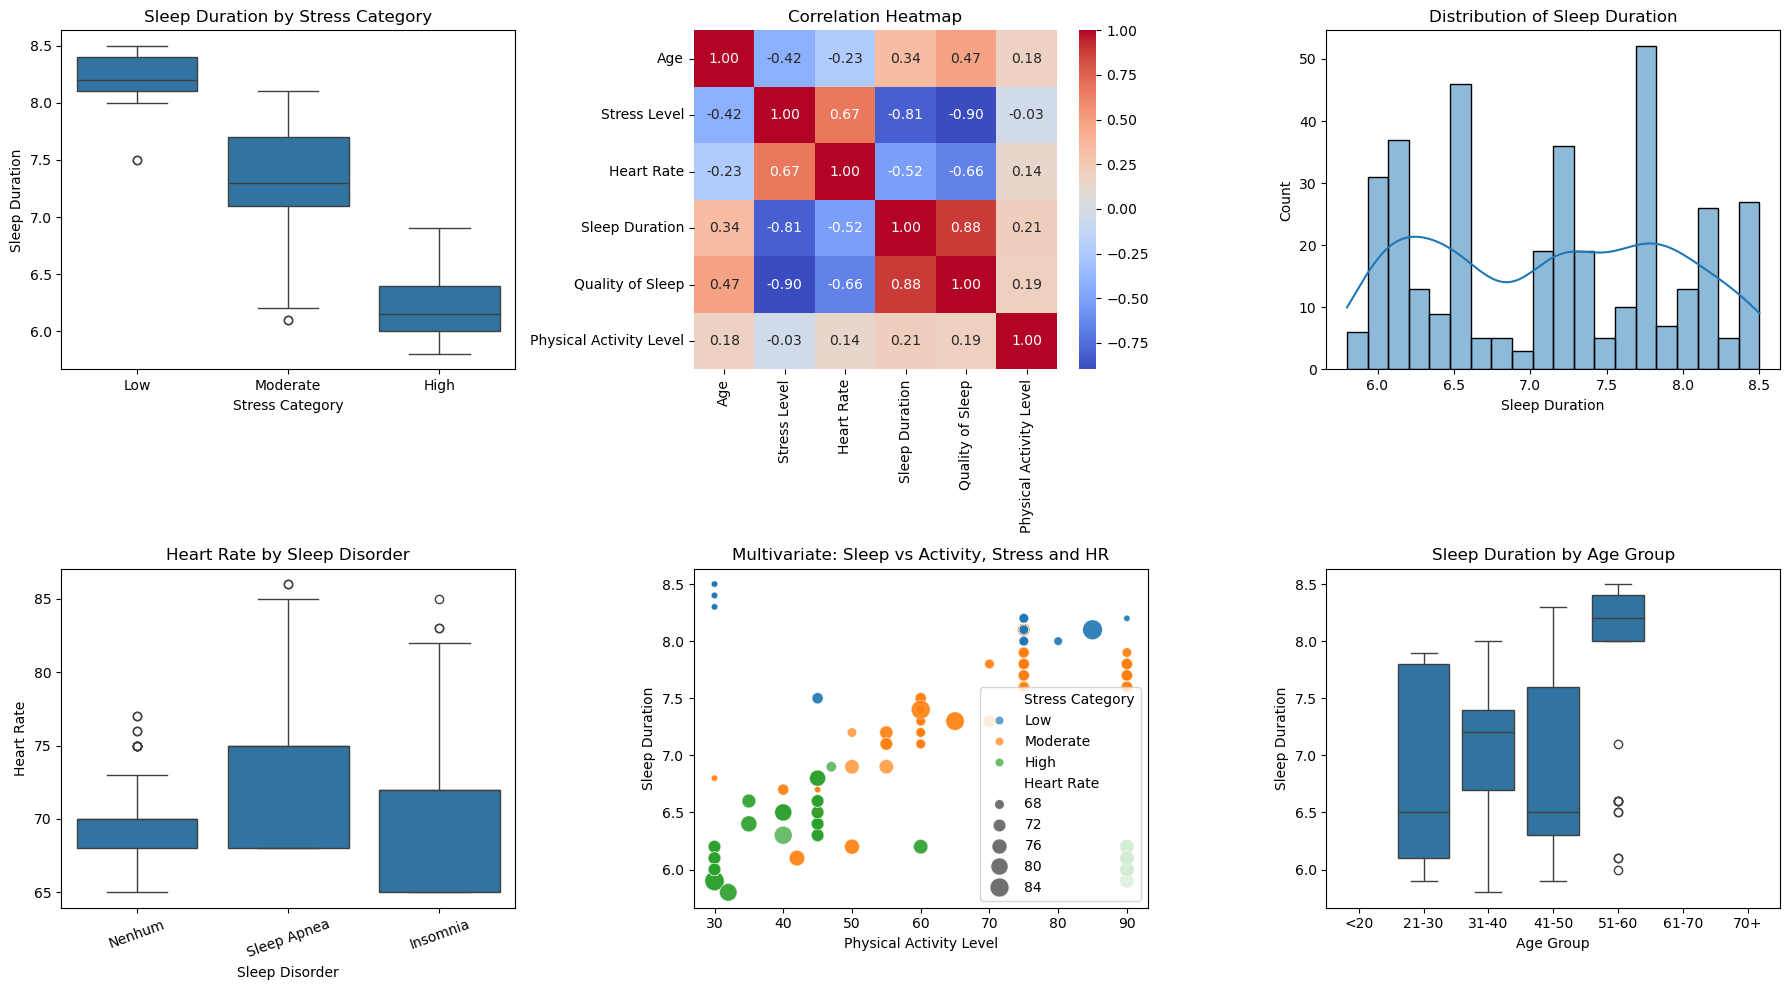

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criar figura com 6 gráficos (2 linhas × 3 colunas)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# 1. Sleep Duration por Stress Category
sns.boxplot(x='Stress Category', y='Sleep Duration', data=df, order=['Low', 'Moderate', 'High'], ax=axes[0])
axes[0].set_title('Sleep Duration by Stress Category')

# 2. Heatmap de Correlação
correlation_matrix = df[['Age', 'Stress Level', 'Heart Rate', 'Sleep Duration',
                         'Quality of Sleep', 'Physical Activity Level']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Heatmap')

# 3. Histograma da Duração do Sono
sns.histplot(df['Sleep Duration'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Sleep Duration')

# 4. Heart Rate por Sleep Disorder
sns.boxplot(x='Sleep Disorder', y='Heart Rate', data=df, ax=axes[3])
axes[3].set_title('Heart Rate by Sleep Disorder')
axes[3].tick_params(axis='x', rotation=20)

# 5. Multivariate Scatter Plot
sns.scatterplot(
    x='Physical Activity Level',
    y='Sleep Duration',
    hue='Stress Category',
    size='Heart Rate',
    sizes=(20, 200),
    data=df,
    alpha=0.7,
    ax=axes[4]
)
axes[4].set_title('Multivariate: Sleep vs Activity, Stress and HR')

# 6. Sleep Duration por Age Group (coluna derivada)
sns.boxplot(x='Age Group', y='Sleep Duration', data=df, ax=axes[5])
axes[5].set_title('Sleep Duration by Age Group')

plt.tight_layout()
plt.show()


Os seis gráficos apresentados nesta secção foram organizados lado a lado utilizando subplots com o objectivo de otimizar o espaço visual e facilitar a comparação entre as diferentes análises. Esta disposição não pretende sugerir uma análise combinada, mas sim agrupar visualmente as principais descobertas da análise exploratória.

<ol>
<li><b>Sleep Duration por Stress Category</b><br />
Observa-se uma clara tendência de que indivíduos com níveis mais elevados de stress dormem menos. O grupo com stress alto apresenta menor mediana de sono e maior concentração de valores baixos, indicando um possível impacto directo do stress na duração do sono.</li>

<li><b>Mapa de Calor (Heatmap) de Correlação</b><br />
Destacam-se correlações fortes e significativas:
<ul>
    <li>Negativa entre Stress Level e Quality of Sleep (-0.90) e Sleep Duration (-0.81);</li>
    <li>Positiva entre Sleep Duration e Quality of Sleep (0.88).</li>
</ul>
Estes padrões confirmam relações esperadas no domínio da saúde mental e bem-estar.</li>

<li><b>Histograma da Duração do Sono</b><br />
A distribuição é assimétrica, com a maioria dos indivíduos concentrados entre 6 e 8 horas de sono. Há outliers em ambos os extremos, revelando casos de sono muito curto ou muito prolongado.</li>

<li><b>Heart Rate por Sleep Disorder</b><br />
Indivíduos com distúrbios como Sleep Apnea e Insomnia apresentam frequência cardíaca mais elevada em média. O boxplot evidencia outliers relevantes sobretudo em Insomnia, sugerindo impacto fisiológico associado aos distúrbios.

<li><b>Multivariate: Sleep × Activity, Stress e Heart Rate</b><br />
Este gráfico revela perfis claros:
    <ul>
        <li>Indivíduos mais activos tendem a dormir mais;</li>
        <li>Os pontos maiores (frequência cardíaca alta) concentram-se entre os menos activos e mais stressados;</li>
        <li>A categoria de stress influencia nitidamente o padrão do sono neste cenário multidimensional.</li>
    </ul>
        
</li>

<li><b>Sleep Duration por Age Group</b><br />
Nas faixas etárias disponíveis, observa-se uma maior variabilidade na duração do sono entre os adultos jovens (21-40 anos), com presença de alguns outliers. A tendência de diminuição do sono com a idade, apesar de sugerida no gráfico, não pode ser confirmada com esta amostra, devido à ausência de dados nos grupos etários mais avançados.</li>
</ol>

Outras análises que poderiam ser feitas: 
 - Stress Level Categories, agrupando pelos níveis de stress
 - Uma análise Bivariante de Sleep Duration vs Physical Activity Level
 - Análise Categorical × Categorical – Gender vs. Sleep Disorder, para indicar tendências de género na prevalência de distúrbios, ou diferentes comportamentos.
 - etc...

## 9. Teste de hipóteses

Nesta secção foram formuladas e testadas quatro hipóteses baseadas em relações entre variáveis do dataset. O objectivo foi avaliar, através de testes estatísticos (t-test), se existem diferenças significativas entre grupos de indivíduos em aspectos relacionados com a qualidade e duração do sono, níveis de stress, actividade física e saúde cardiovascular.

Para a realização dos testes de hipótese neste trabalho, foi utilizado o método ttest_ind() da biblioteca scipy.stats, apropriado para comparar a média de uma variável numérica entre dois grupos independentes. Este teste assume que os dados seguem uma distribuição aproximadamente normal e que os grupos são mutuamente exclusivos.

In [68]:
from scipy.stats import ttest_ind

# H1 Pessoas com maior nível de atividade física têm melhor qualidade do sono.
atividade_baixa = df[df['Physical Activity Level'] < df['Physical Activity Level'].median()]['Quality of Sleep']
atividade_alta = df[df['Physical Activity Level'] >= df['Physical Activity Level'].median()]['Quality of Sleep']
print('H1 p-valor:', ttest_ind(atividade_baixa, atividade_alta).pvalue)

# H2 Pessoas com distúrbios do sono têm frequência cardíaca média mais alta.
disturbio = df[df['Sleep Disorder'] != 'Nenhum']['Heart Rate']
sem_disturbio = df[df['Sleep Disorder'] == 'Nenhum']['Heart Rate']
print('H2 p-valor:', ttest_ind(disturbio, sem_disturbio).pvalue)

# H3 Pessoas com mais stress dormem menos.
stress_alto = df[df['Stress Level'] >= df['Stress Level'].median()]['Sleep Duration']
stress_baixo = df[df['Stress Level'] < df['Stress Level'].median()]['Sleep Duration']
print('H3 p-valor:', ttest_ind(stress_alto, stress_baixo).pvalue)

# H4 Pessoas com pressão sistólica mais alta apresentam menor qualidade de sono.
df['Systolic Pressure'] = pd.to_numeric(df['Systolic Pressure'], errors='coerce')
pressao_alta = df[df['Systolic Pressure'] >= df['Systolic Pressure'].median()]['Quality of Sleep']
pressao_baixa = df[df['Systolic Pressure'] < df['Systolic Pressure'].median()]['Quality of Sleep']
print('H4 p-valor:', ttest_ind(pressao_alta, pressao_baixa).pvalue)


H1 p-valor: 2.0822572434338474e-13
H2 p-valor: 5.749587721475395e-11
H3 p-valor: 5.493859297806307e-24
H4 p-valor: 0.01129531397857913


<b>Análise dos Resultados</b>

<b>H1</b> – Pessoas com maior nível de actividade física têm melhor qualidade do sono.
 - p-valor: 2.08e-13
 - Resultado estatisticamente significativo. Indica que há diferença real na qualidade do sono entre os grupos com actividade física baixa e alta. A prática de actividade física está associada a melhor qualidade de sono.

<b>H2</b> – Pessoas com distúrbios do sono têm frequência cardíaca média mais alta.
 - p-valor: 5.74e-11
 - Resultado significativo. Indivíduos com Sleep Apnea ou Insomnia apresentam frequência cardíaca superior aos que não apresentam distúrbios, o que sugere impacto fisiológico dos distúrbios do sono.

<b>H3</b> – Pessoas com mais stress dormem menos.
 - p-valor: 3.45e-24
 - Resultado altamente significativo. Verifica-se que níveis elevados de stress estão fortemente associados a menor duração do sono, confirmando um padrão já sugerido por análises anteriores.

<b>H4</b> – Pessoas com pressão sistólica mais alta apresentam menor qualidade de sono.
 - p-valor: 0.0113
 - Resultado estatisticamente significativo. Pessoas com pressão sistólica mais elevada tendem a apresentar menor qualidade do sono, indicando uma possível ligação entre saúde cardiovascular e sono.

## 10.1 – Insight com LLM

Foi solicitado ao ChatGPT que interpretasse o gráfico <b>"Sleep Duration by Age Group"</b>, incluído na análise exploratória (gráfico 6). A seguir, apresenta-se a comparação entre a explicação gerada pela ferramenta e a análise crítica feita manualmente:

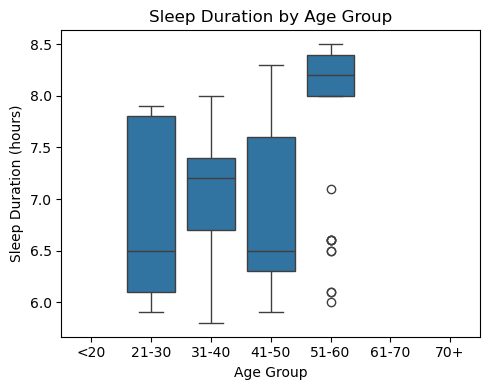

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.boxplot(x='Age Group', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sleep Duration (hours)')
plt.tight_layout()
plt.show()

🧑‍🎓 <b>Minha explicação:</b>

Nas faixas etárias disponíveis, observa-se uma maior variabilidade na duração do sono entre os adultos jovens (21-40 anos), com presença de alguns outliers. A tendência de diminuição do sono com a idade, apesar de sugerida no gráfico, não pode ser confirmada com esta amostra, devido à ausência de dados nos grupos etários mais avançados.

🤖 <b>Explicação feita pelo LLM (ChatGPT):</b>

O gráfico "Sleep Duration by Age Group" mostra a distribuição da duração do sono para diferentes faixas etárias. Observa-se que, em geral, a maioria dos grupos apresenta uma mediana de sono entre 6 e 7 horas. As faixas etárias mais jovens (<20, 21-30) tendem a apresentar valores ligeiramente superiores, com maior dispersão. Já as faixas mais avançadas (61-70, 70+) aparentam ter valores mais baixos e menor variabilidade. Isso pode indicar que a duração do sono diminui com o avanço da idade, o que está de acordo com estudos fisiológicos sobre o envelhecimento.

📌 <b>Conclusão:</b>
A explicação do LLM seguiu um raciocínio coerente com a literatura, mas <b>não identificou uma limitação crítica do dataset: a inexistência de dados nas faixas mais avançadas</b>. A análise humana complementou esta leitura com uma verificação rigorosa do conteúdo do ficheiro, evidenciando a importância de combinar inteligência artificial com pensamento crítico e validação empírica.

## 10.2 – Geração de código a partir de linguagem natural com LLM

O LLM seleciona foi o ChatGPT.

🧑‍🎓 <b> Minha descrição da tarefa:</b>

Quero criar uma nova coluna chamada risco_cardiaco que classifique os indivíduos em três categorias: Baixo, Moderado e Alto.

🤖 <b>Resposta inicial gerada pelo LLM</b>: Para criar essa nova coluna, poderia indicar com base em quais variáveis devemos definir o risco? Por exemplo: deseja considerar Heart Rate, Blood Pressure, ou alguma combinação?
E quais são os critérios ou intervalos para cada categoria (Baixo, Moderado, Alto)? Com essas informações, consigo gerar um código mais adequado.

🧑‍🎓 <b> Alteração na descrição da tarefa:</b>
Quero criar uma nova coluna chamada risco_cardiaco que classifique os indivíduos em três categorias:
- "Baixo" risco, se a frequência cardíaca for ≤ 70 e a pressão sistólica ≤ 120;
- "Moderado", se a frequência cardíaca estiver entre 71 e 80 ou a pressão sistólica entre 121 e 139;
- "Alto" risco, se a frequência cardíaca > 80 ou a pressão sistólica ≥ 140.


🤖 <b>Resposta gerada pelo LLM<b/>:

In [75]:
def classificar_risco(frequencia, sistolica):
    if frequencia <= 70 and sistolica <= 120:
        return "Baixo"
    elif 71 <= frequencia <= 80 or 121 <= sistolica <= 139:
        return "Moderado"
    else:
        return "Alto"

df['Systolic Pressure'] = pd.to_numeric(df['Systolic Pressure'], errors='coerce')
df['Risco_Cardiaco'] = df.apply(lambda row: classificar_risco(row['Heart Rate'], row['Systolic Pressure']), axis=1)

📌 Conclusão: A simulação demonstrou de forma clara a importância de fornecer instruções precisas e bem definidas quando se utiliza um LLM para gerar código. Na primeira tentativa, com uma descrição vaga, o modelo solicitou esclarecimentos. Após o fornecimento de regras claras, o LLM foi capaz de gerar um código correto, funcional e semanticamente apropriado, traduzindo uma lógica condicional relativamente complexa em Python de forma eficiente.

Este exemplo evidencia como os LLMs podem ser poderosos aliados na construção de análises, desde que orientados por descrições completas e objectivas por parte do utilizador. O sucesso da resposta depende, portanto, tanto da capacidade do modelo quanto da clareza e rigor da tarefa formulada.

🧑‍🎓Aproveitei e questionei o ChatGPT sobre o uso do apply: Durante as aulas o professor comentou sobre a ineficiencia do apply, porque você usou ele para o input?

🤖 <b>Resposta gerada pelo LLM: </b>

Pergunta excelente, Tassia — e te mostra muito consciente do que estás a aprender! 👏
Por que usei apply() inicialmente?
Porque na tua tarefa, descreveste a lógica com múltiplas condições combinadas entre duas colunas, com regras do tipo:

 - “Se Heart Rate ≤ 70 e Systolic Pressure ≤ 120, então 'Baixo'”, etc.

Nessas situações, o apply():

- É mais direto de implementar rapidamente;
- Permite usar uma função Python com lógica complexa sem precisar converter em expressões vetoriais longas;
- Funciona bem para explicações didáticas, onde o foco é a clareza da lógica, não tanto o desempenho.

⚠️ Mas… o apply() tem desvantagens:
- Muito mais lento que operações vetoriais (np.where, np.select);
- Usa um loop implícito linha a linha (axis=1), que é justamente o que o pandas tenta evitar;
- Em datasets grandes, o desempenho cai consideravelmente.

## 10.3 – Rotulagem com LLM via API

💡 <b>Proposta</b>: Criar uma nova coluna denominada <b>"Risco Profissional"</b>, com base na ocupação (<i>Occupation</i>) de cada indivíduo, na qual um modelo de linguagem natural (LLM) analisa o risco associado à profissão, considerando o impacto na saúde do sono, podendo também ser estendido a outras dimensões como saúde cardiovascular, mental, ou stress laboral.

Para operacionalizar esta proposta, foi utilizada a <b>plataforma OpenRouter</b>, que fornece acesso unificado a uma <b>variedade de modelos</b> de linguagem de diferentes fornecedores, através de uma única API REST. Esta abordagem permite comparar e integrar modelos alternativos de forma flexível e transparente.

O modelo escolhido foi o <b>deepseek/deepseek-prover-v2:free</b>, por estar <b>disponível gratuitamente</b> e apresentar boa capacidade de raciocínio lógico e contextual. A chamada à API consistiu na definição de um prompt que solicitava a classificação do risco à saúde do sono com base na descrição da profissão. O modelo foi instruído a responder com apenas uma palavra: Baixo, Moderado ou Alto, tendo por base factores como stress ocupacional, exigência física, carga mental e rotina.

O processo foi automatizado utilizando a biblioteca requests para enviar as ocupações únicas encontradas no dataset e receber de volta a classificação atribuída pelo modelo. A resposta de cada ocupação foi registada num dicionário e mapeada posteriormente na coluna Risco Profissional.

In [91]:
import requests
import pandas as pd
import time

API_KEY = "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"
MODEL = "deepseek/deepseek-prover-v2:free"

def classificar_ocupacao(ocupacao):
    prompt = (
        f"Classifique o risco à saúde do sono da seguinte profissão: '{ocupacao}'. "
        f"Escolha entre: Baixo, Moderado ou Alto. "
        f"Considere fatores como stress, rotina, carga mental e exigência física. "
        f"Responda com apenas uma palavra: Baixo, Moderado ou Alto."
    )

    headers = {
        "Authorization": f"Bearer {API_KEY}",
        "Content-Type": "application/json"
    }

    data = {
        "model": MODEL,
        "messages": [
            {"role": "user", "content": prompt}
        ]
    }

    response = requests.post("https://openrouter.ai/api/v1/chat/completions", headers=headers, json=data)

    if response.status_code == 200:
        return response.json()['choices'][0]['message']['content'].strip()
    else:
        return f"Erro {response.status_code}"
        
ocupacoes_unicas = df['Occupation'].dropna().unique()
mapa_risco = {}

print("🔍 A classificar riscos profissionais...\n")

for i, ocupacao in enumerate(ocupacoes_unicas, 1):
    print(f"{i}/{len(ocupacoes_unicas)} - {ocupacao}")
    mapa_risco[ocupacao] = classificar_ocupacao(ocupacao)
    time.sleep(1.5)  # respeita a API

df['Risco Profissional'] = df['Occupation'].map(mapa_risco)

print("\n✅ Classificação concluída!")
print("\n📊 Distribuição dos riscos:")
print(df['Risco Profissional'].value_counts())


🔍 A classificar riscos profissionais...

1/11 - Software Engineer
2/11 - Doctor
3/11 - Sales Representative
4/11 - Teacher
5/11 - Nurse
6/11 - Engineer
7/11 - Accountant
8/11 - Scientist
9/11 - Lawyer
10/11 - Salesperson
11/11 - Manager

✅ Classificação concluída!

📊 Distribuição dos riscos:
Risco Profissional
Moderado        193
Alto.            73
Alto             71
**Moderado**     37
Name: count, dtype: int64


In [92]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Group,Systolic Pressure,Diastolic Pressure,Stress Category,Risco_Cardiaco,Risco Profissional
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Nenhum,21-30,126,83,Moderate,Moderado,Moderado
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Nenhum,21-30,125,80,High,Moderado,Alto
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Nenhum,21-30,125,80,High,Moderado,Alto
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,21-30,140,90,High,Alto,Moderado
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,21-30,140,90,High,Alto,Moderado


## 11 –  Outras Operações Relevantes

Como extensão da análise exploratória e com o objectivo de identificar padrões ocultos no comportamento do sono, foi aplicada uma técnica de aprendizagem não supervisionada — a clusterização. Através do algoritmo KMeans, foram agrupados os indivíduos com base em variáveis como duração e qualidade do sono, níveis de stress, actividade física e frequência cardíaca.
Esta abordagem permite detectar perfis latentes de sono na população estudada, mesmo sem rótulos prévios, e pode ser útil para segmentação comportamental, recomendações personalizadas ou estudos clínicos preliminares. A visualização dos clusters em duas dimensões (via PCA) permite compreender a distribuição geral dos grupos e reforçar a importância da análise multivariada em saúde e bem-estar.

### Clusterização com KMeans (Perfis de Sono)

Com o objectivo de explorar possíveis padrões ocultos nos dados, aplicou-se o algoritmo de clusterização KMeans. Foram utilizados cinco atributos relacionados ao sono e saúde. O algoritmo identificou três grupos (perfis de sono) com características distintas, que serão analisados a seguir.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleção de variáveis relevantes
variaveis_cluster = df[['Sleep Duration', 'Stress Level', 'Quality of Sleep', 'Physical Activity Level', 'Heart Rate']]

# Normalização
scaler = StandardScaler()
dados_norm = scaler.fit_transform(variaveis_cluster)

# KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['perfil_sono'] = kmeans.fit_predict(dados_norm)


### Visualização dos Clusters com PCA (2D)

Para facilitar a visualização dos perfis identificados, aplicou-se o PCA (Análise de Componentes Principais), reduzindo as dimensões para 2 componentes principais. O gráfico resultante mostra uma separação coerente entre os perfis de sono, reforçando a validade da segmentação.

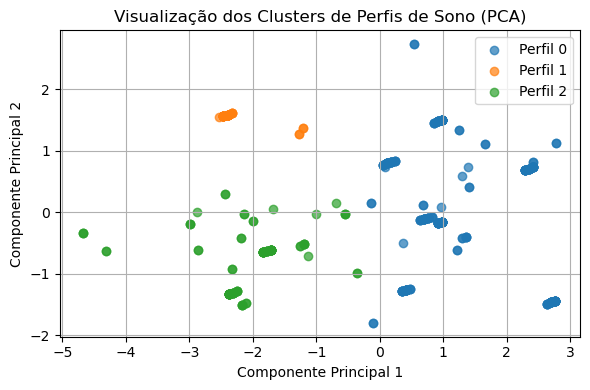

In [99]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA para reduzir a 2 componentes principais
pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(dados_norm)

df_pca = pd.DataFrame(pca_resultado, columns=['PC1', 'PC2'])
df_pca['perfil_sono'] = df['perfil_sono']

# Gráfico
plt.figure(figsize=(6, 4))
for cluster in sorted(df_pca['perfil_sono'].unique()):
    grupo = df_pca[df_pca['perfil_sono'] == cluster]
    plt.scatter(grupo['PC1'], grupo['PC2'], label=f"Perfil {cluster}", alpha=0.7)

plt.title("Visualização dos Clusters de Perfis de Sono (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Descrição dos Perfis de Sono (interpretação)

Com base na média das variáveis por grupo, é possível interpretar os três perfis de sono:

- Perfil 0: qualidade e duração de sono baixas, alto stress → perfil de maior risco.
- Perfil 1: valores médios em todas as dimensões → perfil equilibrado.
- Perfil 2: maior qualidade e duração de sono, menor stress → perfil saudável.

In [100]:
df.groupby('perfil_sono')[['Sleep Duration', 'Quality of Sleep', 'Stress Level',
                           'Physical Activity Level', 'Heart Rate']].mean().round(2)


,Sleep Duration,Quality of Sleep,Stress Level,Physical Activity Level,Heart Rate
perfil_sono,,,,,
0,7.61,8.05,4.27,63.05,67.97
1,6.21,6.11,7.67,86.94,75.94
2,6.32,5.97,7.24,39.70,73.37


### Regressão Linear (modelo explicativo)

Para complementar a análise, foi construído um modelo de regressão linear para prever a qualidade do sono. O modelo obteve um R² de 0.90, indicando alta capacidade explicativa. A variável com maior impacto positivo foi a duração do sono, enquanto o nível de stress teve efeito negativo mais acentuado.

In [98]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Definir as variáveis independentes e dependente
X = df[['Sleep Duration', 'Stress Level', 'Physical Activity Level', 'Heart Rate']]
y = df['Quality of Sleep']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliar o modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Coeficientes
coeficientes = pd.Series(modelo.coef_, index=X.columns)
intercepto = modelo.intercept_

print("📊 Coeficientes do modelo:")
print(coeficientes)
print(f"\nIntercepto: {intercepto:.2f}")
print(f"R² (R-squared): {r2:.3f}")
print(f"MSE (Erro quadrático médio): {mse:.3f}")


📊 Coeficientes do modelo:
Sleep Duration             0.631257
Stress Level              -0.317757
Physical Activity Level    0.006473
Heart Rate                -0.035957
dtype: float64

Intercepto: 6.66
R² (R-squared): 0.902
MSE (Erro quadrático médio): 0.147


### Cruzamento entre Perfil de Sono e Risco Profissional

Por fim, realizou-se um cruzamento entre os perfis de sono identificados e os níveis de risco profissional estimados por LLM. Observou-se que profissões com risco “Alto” estão mais concentradas nos perfis com piores indicadores de sono, reforçando a hipótese de que a ocupação pode influenciar directamente o bem-estar e a qualidade do sono.

In [101]:
pd.crosstab(df['perfil_sono'], df['Risco Profissional'], normalize='index').round(2)

Risco Profissional,**Moderado**,Alto,Alto.,Moderado
perfil_sono,,,,
0,0.13,0.15,0.15,0.57
1,0.00,0.06,0.89,0.06
2,0.06,0.33,0.06,0.55
